# Lotka-Volterra Model

The Lotka-Volterra model is a simple mathematical model used to describe the predator-prey relationship between two species. It is also known as the predator-prey model. The model was first proposed by Alfred Lotka in 1925 and later expanded by Vito Volterra in 1926.

### The model consists of two differential equations:

$$ \dot{u} = au - buv \\
\dot{v} = -cv + duv $$

Where u and v are the population sizes of the prey and predator species, respectively. The parameters a, b, c, and d represent the following:

**a**: growth rate of the prey in the absence of predators \
**b**: death rate of the prey due to predation \
**c**: death rate of the predator in the absence of prey \
**d**: growth rate of the predator per prey consumed 

The model assumes that the prey population grows exponentially in the absence of predators, and the predator population declines in the absence of prey. When predators are present, they consume the prey at a rate proportional to the product of the predator and prey populations. The dynamics of the two populations are influenced by the interaction between the two species.

*In this implementation, we will visualize the behavior of the model using a vector field, phase portrait, and invariant curves.

## Code Implementation

First, we import the necessary libraries: numpy for numerical computation, matplotlib for visualization, and scipy for solving the differential equations using odeint.


In [11]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint

Next, we define the function for the Lotka-Volterra system, which takes in the current state y, time t, and parameters a, b, c, and d. It returns the rate of change of the prey and predator populations, du/dt and dv/dt, respectively.

In [14]:
def lotka_volterra(y, t, a, b, c, d):
    u, v = y
    return [a*u - b*u*v, -c*v + d*u*v]

We then set the values of the parameters a, b, c, and d.

In [16]:
a = 1.5
b = 1
c = 3
d = 1

We plot the vector field of the Lotka-Volterra system using the quiver function from matplotlib. We create a meshgrid of points in the (u, v) plane and calculate the rate of change of the prey and predator populations at each point. The magnitude of the rate of change is represented by the length of the arrow, and the color represents the magnitude of the rate of change.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Lotka-Volterra System Vector Field')

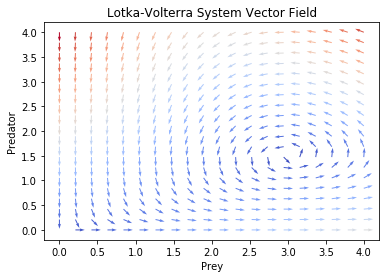

In [17]:
U, V = np.meshgrid(np.linspace(0, 4, 20), np.linspace(0, 4, 20))
dU, dV = lotka_volterra([U, V], 0, a, b, c, d)
M = np.hypot(dU, dV)
plt.quiver(U, V, dU/M, dV/M, M, cmap=plt.cm.coolwarm)
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Lotka-Volterra System Vector Field')

We then plot the phase portrait of the Lotka-Volterra system using the odeint function from scipy. We define an array of time values t and an initial state y0. We then solve the differential equations for the given time and parameters, and plot the trajectory of the prey and predator populations in the (u, v) plane. We also mark the initial and final points of the trajectory.

This block of code generates a vector field plot for the Lotka-Volterra system using the quiver() function from Matplotlib. The np.meshgrid() function is used to create a grid of points for the U and V variables, which are the prey and predator populations respectively. The lotka_volterra() function is then called with these values to calculate the rate of change of the prey and predator populations. The np.hypot() function is used to calculate the magnitude of the rate of change at each point in the grid, which is used to normalize the arrows in the plot. Finally, the quiver() function is used to plot the arrows, with the magnitude represented by color using the cmap parameter. The xlabel(), ylabel(), and title() functions are used to label the plot.

Text(0.5, 1.0, 'Lotka-Volterra Phase Portrait')

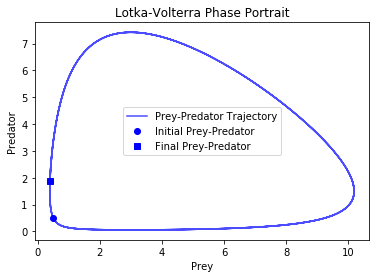

In [20]:
# Plot phase portrait
t = np.linspace(0, 15, 1000)
y0 = [0.5, 0.5]
y = odeint(lotka_volterra, y0, t, args=(a, b, c, d))
plt.figure()
plt.plot(y[:,0], y[:,1], 'b-', alpha=0.7, label='Prey-Predator Trajectory')
plt.plot(y[0,0], y[0,1], 'bo', label='Initial Prey-Predator')
plt.plot(y[-1,0], y[-1,1], 'bs', label='Final Prey-Predator')
plt.legend(loc='best')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Lotka-Volterra Phase Portrait')


This block of code generates a phase portrait for the Lotka-Volterra system using the odeint() function from SciPy. The t variable is used to define the time interval over which to simulate the system. The initial prey and predator populations are defined as [0.5, 0.5] using the y0 variable. The odeint() function is then used to integrate the system over the time interval t, using the lotka_volterra() function and the parameters defined earlier. The resulting prey and predator populations are plotted using the plot() function, with the prey population on the x-axis and the predator population on the y-axis. The alpha parameter is used to control the transparency of the line, and the label parameter is used to label the plot. The initial and final prey and predator populations are also plotted as circles and squares, respectively, using the plot() function with the bo and bs markers. The legend(), xlabel(), ylabel(), and title() functions are used to label the plot.

The third plot shows the invariant curves of the Lotka-Volterra system. An invariant is a function that remains constant along trajectories of the system. In this case, we can define an invariant function as:

log(u)−u+2log(v)−v

This function is chosen because it is conserved along the trajectories of the Lotka-Volterra system. To visualize this, we plot the contour lines of this function for various values. The lines where the function takes on a constant value are the invariant curves.

To create the plot, we first define a function invariant that takes in a state [u, v] and returns the value of the invariant function. Then, we create a meshgrid of x and y values using np.meshgrid and compute the invariant function for each point on the grid. Finally, we plot the contour lines of the invariant function using plt.contour, with the levels set to np.arange(-6, 7) to show a range of values.

The resulting plot shows the invariant curves as a set of nested ellipses. These curves correspond to different initial conditions that lead to the same qualitative behavior of the Lotka-Volterra system. Specifically, trajectories that start inside a given invariant curve will remain inside that curve, while trajectories that start outside the curve will cross it.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


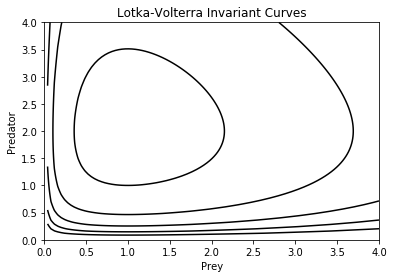

In [21]:
# Plot invariants
def invariant(y):
    u, v = y
    return np.log(u) - u + 2*np.log(v) - v

x = np.linspace(0, 4, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)
Z = invariant([X, Y])
plt.figure()
plt.contour(X, Y, Z, levels=np.arange(-6, 7), colors='k', linestyles='solid')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Lotka-Volterra Invariant Curves')

plt.show()


The invariant function takes in a state vector [u, v] and computes the value of the invariant function defined earlier. We then create a meshgrid of x and y values using np.meshgrid, and compute the invariant function for each point on the grid. Finally, we plot the contour lines of the invariant function using plt.contour, with the levels set to np.arange(-6, 7) to show a range of values. The resulting plot shows the invariant curves as nested ellipses.

## References

1. Murray, J.D. (2002) "Mathematical Biology: I. An Introduction" (Springer-Verlag)
2. Strogatz, S.H. (2015) "Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering" (Westview Press)
3. SciPy documentation on odeint: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
4. Matplotlib documentation on quiver: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
5. Matplotlib documentation on contour: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
